In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Gradient Descent

## Introduction
##### The methods for finding the maximum and minimum (extrema) of function have been created with developing of mathematical analysis.Gradient descent is numerical approach to find extrema of function which is enough optimized and very useful is very used especially in machine learning.The algorithm is very simple and very convenient in case when the function has only one extremum,when the function has many local extrema the task become more difficult

In [1]:
## Abstract 
# The main idea if gradient descent is 

## Methods 
##### At first  we going to investigate most simple quadratic function $y=x^2$
##### where its derivate is $y'=2*x$

In [76]:
#### SOME IMPORT FUNCTION FOR PLOTING AND CALCULATING DERIVATE

def plot_function(x_args,y_args,show=True,label='',x_label='',y_label=''): 
    """
    """
    plt.plot(x_args,y_args,label=label)
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if show:
        plt.show()


def plt_properties():
    ax = plt.gca()
    plt.xlim(-10, 10)
    plt.ylim(-10, 100)

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    der = (function(point + precision) - function(point)) / precision
    return der

def plot_derivative_at_point(function, point, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    plt_properties()
    vectorized_function = np.vectorize(function)

    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)

    slope = 0  # Slope of the tangent line
    if derivative is None:
        slope = calculate_derivative_at_point(function, point)
    else:
        slope = derivative(point)

    intercept = function(point) - slope * point
    tangent_line_x = np.linspace(point - 4.5, point + 4.5, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y)
    plt.plot(tangent_line_x, tangent_line_y,color='r')        

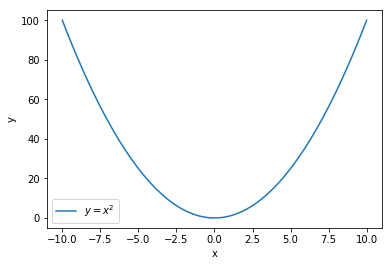

In [70]:
y = lambda x : x**2
x_args = np.linspace(-10,10)
y_args = y(x_args)
plot_function(x_args,y_args,label="$y=x^2$",x_label='x',y_label='y')

##### The above graphic immediatly shows  the min value of y  is  when  x = 0, but we have to make an algorithm wich is able to find numericaly x value ,especialy in more sophisticated functions which contains  many variables. 




In [ ]:
### The function roughtly sayed 

#### When x argument changes  the value of dependent variable y also changes,let's to  give some radom value to x ,the next step is to create the algotirhm wich will increase x with small step wich can be positive or negative in  such way that y must to decrease its value,using gradient of function.

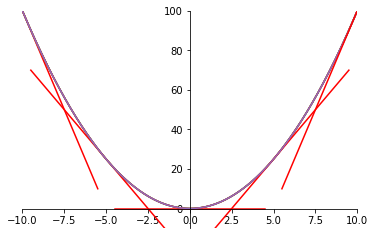

In [77]:
for i in np.linspace(-10,10,5):
    plot_derivative_at_point(y, i, derivative = None, min_x = -10, max_x = 10)

Let's to have the function y=f(x)=$x^2$ 
Let's to give some random variable for x
x=-3
In this case y=9 ,y'=-6,what does it mean y' = -6 this mean that <br>
### f(-3+h)-f(-3)$\approx$ -6*h +O(h) < 0 when x = -3 if we want to decrease y we have to increase x with positive number h in case when f'(x)<0, if we get f(3+h)-f(h) = 6*h>0 we have to increase x with -h ,this is because f'(x) >0 in other words the perpose of alogorith is to dicide What must to be sign of   h (learning rate)  ,and we saw that the sign of range musto to opposite of sigh of gradient.The h is also call sum step or lerning rate usuali that is number between [0,1].

##### the red line shows tangent or first derivate tg of angle between this  with x axis show if the function increase or decrease

### lets to make some importan canclusion from above graphic
1) we can see the tangen left of x=0 is tg(w)<0 right of x=0  tg(w)<0 on tg(w) = 0 ,Thera some famous theorem,called Theremo of Roll we proof analiticaly that in placa where the function has min,tends to this poimnt (f(x+e) - f(x))/e<=0  and (f(x-e) - f(x))/e>=0  => df(x)/dx = 0
2) (f(0) - f(0-e))/e<= 

when x < 0 then 1) $\frac{f(x-h) - f(x)}{h}<0 $ and when x > 0 then 2)$\frac{f(x+h) - f(x)}{h}>0$ IF $\lim_{h \to 0}$ and from 1) and 2) => $\frac{df(0)}{dx} = 0 $ that is theorem of Roll
and when the function tends to zero  function decreasee in zero the function has min 









In [83]:
(3.2)**2

10.240000000000002

#### gradient desent 
let to choose some random point for example x=-3

#### if we investigate the function around the point x1=-3,2 ,x2=-3 , x3 = -2.9 ,x4=-0.1
we have f(x1) = 9,4 f(x2) = 9.3 f(x3)=8.41 f(x4)=0.01

1) x1<x2<x3 2) f(x1)>f(x2)>f(x3)

from 1) and 2) we can canclude when x<0 x increase  the f(x) is decrease 
this can be sumurise x<0 df/dx < 0 this mathemcaticaly writen the function decrease


lets to gets points > 0 
 3) x1=0.1 ,x2=2,x3=3 <br> 4)f(x1)=0.01 f(x2)=4 f(x3)=9 <br>
 from 3) and 4) we can conclude when x>0 and x increace f(x) also increase and df/dx>0

if we verry  carefuly review 1) 2) 3) 4) we can construct the same alogorim

if df/dx < 0 = the the function decrease this mean if x increase the f(X) will decrease , the we can increament x = x - df/dx*alpha alpa is some number between [0,1]
if df/dx > 0 this mean when x increase f(x) also increase 
  x = x- df/dx  alse with thends to zero


lets to get $f(x)=x^2$

if we investigate the function around the point x  = -3  and to get x1 = -3.1 < x2 = -3 < x3 =-2.9 <br>
f(x1 )=f(-3.1)=9.6 ; <br>  f(x2) = 9 ; <br> f(x3)=f(2.9) = 8.41

when x increase f(x) decrease 1) x1<x2  f(x1)>f(x2) f(x) decrease and f'(x1) < 0
if the function decrease when x increase  if we get x = x+e maybe the function wiil get more less value and f'(x1)<0

lets to get random value after 0
  x1 = 3 < x2 = -3.1 < x3 =  3.2<br>
f(x1 )=9 ; <br>  f(x2) = 9.6 ; <br> f(x3) = 10.3
we can notice that 
when x increase f(x) decrease 1) x1<x2<x3  f(x1)<f(x2)<f(x3) when x increase then f(x) also increase  and f'(x1) > 0
if we have to make choice to get x in this way the next x1 f(x1)<f(x) x1 = x - alpha


In above we can see that when the first derivate < 0 the alpha must to be >0
when derivate > 0 then alpha <0
This verry simple sayed the increase step must to with oposite sign compare with the sign of derivate




In [104]:
def perform_gradien_descet(gradient,init_x,learning_step=0.1,count_iteration=1000):
    x = init_x
    for i in range(count_iteration):
        x = x - gradient(x)*learning_step
        
    return x    
            

In [105]:
gradient = lambda x : 2*x
min_x = perform_gradien_descet(gradient,-10)
print(min_x)
### we can see that x tends 0

-1.2302319221611203e-96


In [107]:
### f(X) x^2 - 4x 
gradient = lambda x : 2*x -4
min_x = perform_gradien_descet(gradient,-10)
print(min_x)
### we can see that x tends 2

1.9999999999999996


### this algoritims can be apply for the function of many variable

In [119]:
def perform_gradien_desent(gradient_x,gradient_y,init_x=-10,init_y=-10,learning_step=0.1,count_iteration=1000):
    x = init_x
    y= init_y
    for i in range(count_iteration):
        x = x - gradient_x(x)*learning_step
        y = y - gradient_y(y)*learning_step
        
    return x,y  


            

$$f(x,y) = x^2 - y^3 -10$$
$$\frac{\partial{f}}{\partial{x}} = 2*x -10 $$
$$\frac{\partial{f}}{\partial{y}} = 3*y -10 $$


In [120]:
gradient_x = lambda x : 2*x -10
gradient_y = lambda x : 3*x -10

perform_gradien_desent(gradient_x,gradient_y)

(4.999999999999998, 3.3333333333333326)